<a href="https://colab.research.google.com/github/princeKike27/Book-Classifier/blob/main/BookClassifieripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book-Classifier

For this project I analyzed data from the Book-Crossings dataset, which contains 1.1 million ratings,
on a scale from 1-10, of 270,000 books by 90,000 users. In that sense, using the K-Nearest Neighbors
algorithm I created a book classifier that based on features like the book´s year of publication and 
its author will predict if I will like a book, and it will recommend me other similar books to read.

Throughout the project you will be able to find:

- Data cleaning and standardization.
- Analysis of Relevant features to build the model.
- KNN Model for book prediction and recommendations.



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_file = 'BX-Books.csv'
ratings_file = 'BX-Book-Ratings.csv'

--2021-10-23 23:00:14--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M   115MB/s    in 0.2s    

2021-10-23 23:00:15 (115 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# create dataframes

# books df
df_books = pd.read_csv(
    books_file,
    encoding='ISO-8859-1', # latin alphabet
    sep=';',
    header=0,
    names=['isbn', 'title', 'author', 'year'],
    usecols=['isbn', 'title', 'author', 'year']
)   

# ratings df
df_ratings = pd.read_csv(
    ratings_file,
    encoding='ISO-8859-1',
    sep=';',
    header=0,
    names=['user_id', 'isbn', 'rating'],
    usecols=['user_id', 'isbn', 'rating']
)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# check books df
df_books.head()

,isbn,title,author,year
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999


In [5]:
# check ratings df
df_ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Books DataFrame

In [6]:
df_books.head()

,isbn,title,author,year
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999


In [7]:
# check shape
df_books.shape

(271379, 4)

In [8]:
# check column types
df_books.dtypes

isbn      object
title     object
author    object
year      object
dtype: object

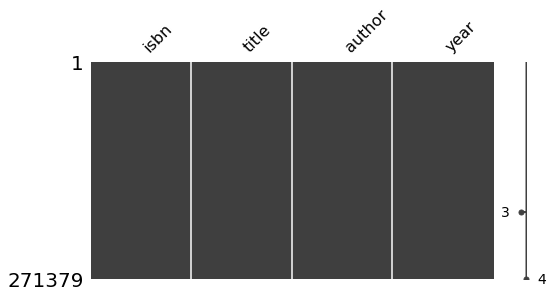

In [9]:
# check for missing values
import missingno as msg

msg.matrix(df_books, figsize=(8,4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Year Column Cleansing

In [10]:
# check unique years in year column
df_books.year.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', 'John Peterman', '1955',
       '1946', '1936', '1930', '2011', '1925', '1948', '1943', '1947',
       '1945', '1923', '2020', '1939', '1926', '1938', '2030',
       '\\"Freedom Song\\""', '1911', '1904', '1949', 'Frank Muir',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', 'ROBERT A. WILSON', '1933', '1902', 'Karen T. Whittenburg',
       '1924', '1921', '1900', '2038', '2026', 'George H. Scherr', '1944',
       '191

In [11]:
years_to_change = df_books[(df_books['year'] == 'John Peterman') | (df_books['year'] == 'Frank Muir')|\
         (df_books['year'] == 'ROBERT A. WILSON') | (df_books['year'] == 'Karen T. Whittenburg')|\
         (df_books['year'] == 'Karen T. Whittenburg') | (df_books['year'] == 'George H. Scherr')|\
         (df_books['year'] == 'Salvador de Madariaga') | (df_books['year'] == 'K.C. Constantine')|\
         (df_books['year'] == 'Stan Berenstain') | (df_books['year'] == 'Francine Pascal')|\
         (df_books['year'] == 'Luella Hill') | (df_books['year'] == 'John Alderson Foote')|\
         (df_books['year'] == 'DK Publishing Inc') | (df_books['year'] == 'Jules Janin')|\
         (df_books['year'] == 'Gallimard') | (df_books['year'] == ' &amp')|\
         (df_books['year'] == ' Learning\"') | (df_books['year'] == 'Isadora Duncan')|\
         (df_books['year'] == 'Beatrix Potter') | (df_books['year'] == 'Bart Rulon')|\
         (df_books['year'] == 'Alan Rich') | (df_books['year'] == '\\"Freedom Song\\""')]

years_to_change

,isbn,title,author,year
6450,0735201994,Peterman Rides Again: Adventures Continue with...,"the Catalog Business""",John Peterman
43665,0330482750,"Three Novels: \A Strange and Sublime Address\""","\""Afternoon Raag\""","\""Freedom Song\"""""
51749,0413326608,"Upon my word!: More stories from \My word!\"" a...","Tony Shryane""",Frank Muir
92036,0440500702,Schrodinger's Cat Trilogy : \The Universe Next...,"\""The Homing Pigeons\""""",ROBERT A. WILSON
104317,0373166982,"Please Say \I Do\"" (Three Weddings &amp","A Hurricane) (Harlequin American Romance, No ...",Karen T. Whittenburg
121766,0894805959,The Best of the Journal of Irreproducible Resu...,"Unfounded Findings\""""",George H. Scherr
144056,8423920143,"GuÃ­a del lector del \Quijote\"": Ensayo psicol...","14 : Ensayo)""",Salvador de Madariaga
150787,034050823X,"The Double Detective: \The Blank Page\"" &amp","\""A Fix Like This\"" (Crime Club)""",K.C. Constantine
157126,039482492X,"C is for Clown: A Circus of \C\"" Words, (Brigh...","early books for beginning beginners)""",Stan Berenstain
180187,0553570722,"\R\"" for Revenge: Written by Kate William",Created by Francine Pascal (Sweet Valley High...,Francine Pascal


In [12]:
# list of indices
indices = list(years_to_change.index)

# list of years
new_years = [2000, 2001, 1974, 1988, 1997, 1989, 1976, 1990, 1972, 1997, 1998, 1973, 2000, 1993, 2003, 2000, 1995,\
             1996, 1976, 1999, 2002, 1995]

# list of authors
authors = ['John Peterman', 'Amit Chaudhuri', 'Frank Muir', 'Robert A. Wilson', 'Karen T. Whittenburg', 'George H. Scherr',\
           'Salvador de Madariaga', 'K.C. Constantine', 'Stan Berenstain', 'Francine Pascal', ' Luella Hill',\
           'John Alderson Foote', 'Michael Teitelbaum', 'Jules Janin', 'Gallimard', 'James Buckley', 'LaVyrle Spencer',\
           'Eleanor Duckworth', 'Isadora Duncan', 'Beatrix Potter', 'Bart Rulon', 'Alan Rich']

In [13]:
# loop throguh every index to change year and author
for el in range(len(indices)):
  df_books.iloc[indices[el]].year = new_years[el]
  df_books.iloc[indices[el]].author = authors[el]

In [14]:
# change year to int type
df_books['year'] = df_books['year'].astype(int)

In [15]:
# check changes
df_books.iloc[121766]

isbn                                             0894805959
title     The Best of the Journal of Irreproducible Resu...
author                                     George H. Scherr
year                                                   1989
Name: 121766, dtype: object

In [16]:
# get descriptive statistics of numeric columns
df_books.describe()

,year
count,271379.000000
mean,1959.763394
std,257.983943
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [17]:
# check books that have year 0
df_books[df_books.year == 0]

,isbn,title,author,year
176,3150000335,Kabale Und Liebe,Schiller,0
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0
...,...,...,...,...
270813,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0
270932,0340571187,Postmens House,Maggie Hemingway,0
271113,8427201079,El Misterio De Sittaford,Agatha Christie,0
271201,0887781721,Tom Penny,Tony German,0


In [18]:
# replace books that have year == | 2030 | 2050 | 2038 | 2026 | 2024 | 2037

df_books['year'].replace(
    {
     2030: 1930,
     2050: 1950,
     2038: 1938,
     2026: 1926,
     2024: 1924,
     2037: 1937},
     inplace=True
)

In [19]:
# make df without books that have year 0
df_book = df_books[df_books.year != 0]

In [20]:
# check changes
df_book.describe()

,year
count,266761.000000
mean,1993.684722
std,8.331988
min,1376.000000
25%,1989.000000
50%,1996.000000
75%,2000.000000
max,2021.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Number of Books Published Per Year

In [21]:
# function to apply count
def calculations(df):
  # dict to store calculations
  calc = {}
  calc['#_books'] = len(df)

  # return a Pandas Series
  return pd.Series(calc, index=['#_books'])

# groupby year
books_year = df_book.groupby('year').apply(calculations).reset_index()

books_year.tail(10)

,year,#_books
99,2003,14359
100,2004,5839
101,2005,46
102,2006,3
103,2008,1
104,2010,2
105,2011,2
106,2012,1
107,2020,3
108,2021,1


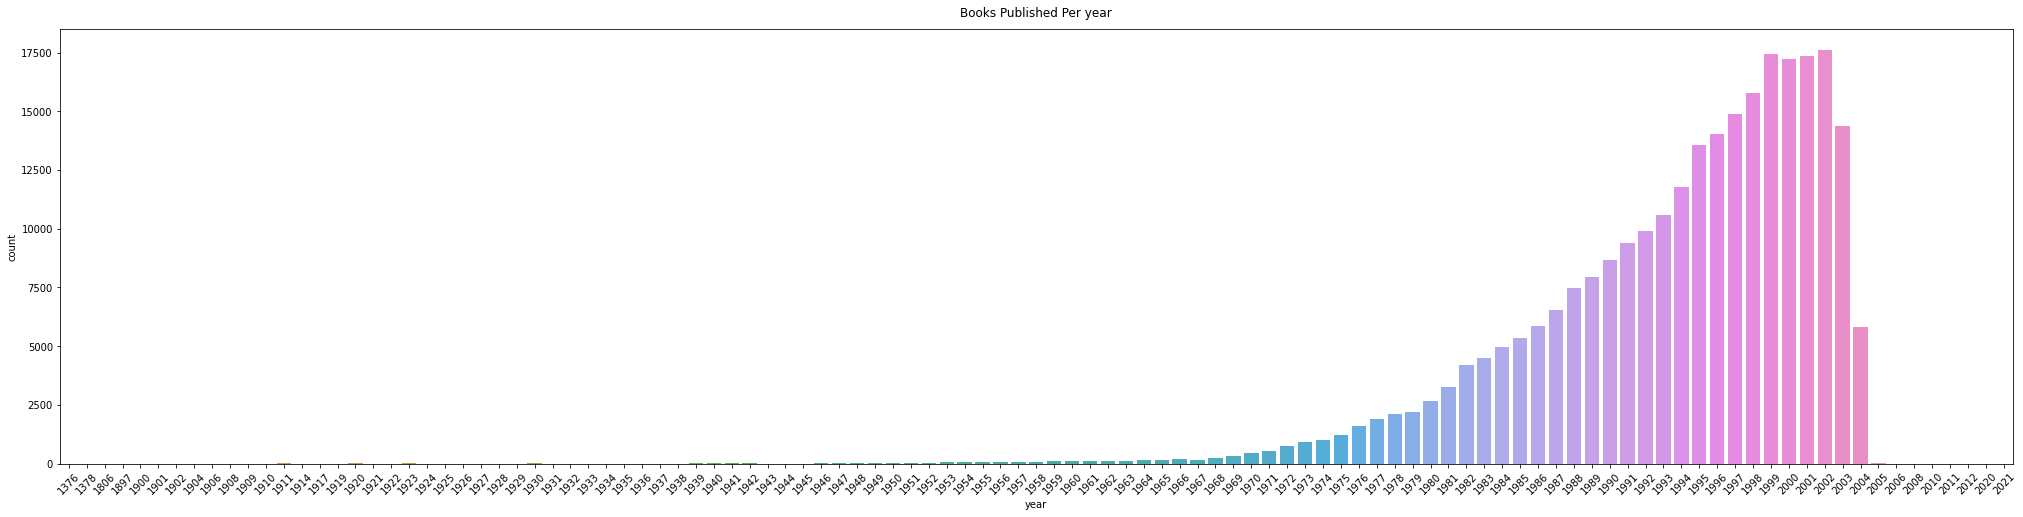

In [22]:
# countplot of books published per year

f, ax = plt.subplots(figsize=(35, 8))


sns.countplot(x=df_book['year'])
plt.xticks(rotation=45)


plt.title('Books Published Per year', pad=12)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Ratings Dataframe

In [23]:
df_ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [24]:
# check shape
df_ratings.shape

(1149780, 3)

In [25]:
# check column types
df_ratings.dtypes

user_id     int64
isbn       object
rating      int64
dtype: object

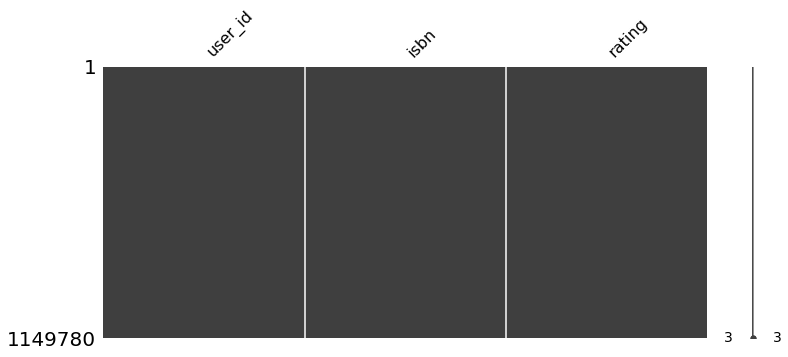

In [26]:
# check for missing values
msg.matrix(df_ratings, figsize=(12,5))

In [27]:
# get descriptive statistics of numeric columns
df_ratings.describe()

,user_id,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Ratings per Book Score

In [28]:
# check unique values in rating column
df_ratings.rating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [29]:
# count number of ratings per rating
df_ratings.rating.value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: rating, dtype: int64

In [30]:
# make df without 0 ratings
df_rate = df_ratings[df_ratings['rating'] != 0]

df_rate.rating.value_counts()

8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: rating, dtype: int64

In [31]:
# descriptive statistics
df_rate.describe()

,user_id,rating
count,433671.000000,433671.000000
mean,135458.743451,7.601066
std,80678.385078,1.843798
min,8.000000,1.000000
25%,66619.000000,7.000000
50%,133184.000000,8.000000
75%,205735.000000,9.000000
max,278854.000000,10.000000


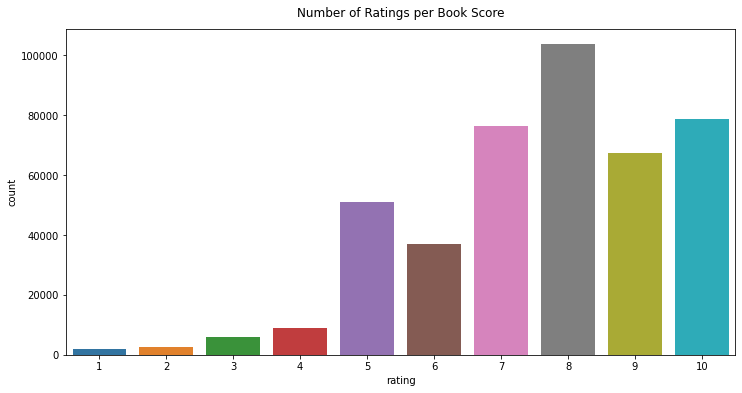

In [32]:
# countplot of ratings

f, ax = plt.subplots(figsize=(12, 6))

sns.countplot(x=df_rate.rating)

plt.title('Number of Ratings per Book Score', pad=12)
plt.show()

#### Avg Score per Book

In [33]:
# avg score per book

avg_score = df_rate.groupby(['isbn']).rating.mean().reset_index()
avg_score.head()

,isbn,rating
0,0330299891,6.0
1,0375404120,3.0
2,9022906116,7.0
3,#6612432,5.0
4,'9607092910',10.0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Merging of df_book & avg_score

In [34]:
# merge df_book & avg_score on the isbn column
df_merged = df_book.merge(avg_score, left_on='isbn', right_on='isbn')
df_merged.head()

,isbn,title,author,year,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,7.666667
1,0060973129,Decision in Normandy,Carlo D'Este,1991,7.500000
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,7.833333
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,8.176471
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,8.000000


In [35]:
# look for George Orwell books
df_merged[df_merged['author'] == 'George Orwell'].head()


,isbn,title,author,year,rating
253,0451526341,Animal Farm,George Orwell,2004,8.369565
1804,0451524934,1984,George Orwell,1990,8.772277
3569,0452254264,Nineteen Eighty-Four,George Orwell,1983,10.000000
4189,0451522303,Animal Farm,George Orwell,1956,9.000000
5046,0451524667,Animal Farm,George Orwell,1990,8.285714


In [36]:
# look for Hermann Hesse books
df_merged[df_merged['author'] == 'Hermann Hesse'].head()

,isbn,title,author,year,rating
1064,3518367064,Demian. Die Geschichte von Emil Sinclairs Jugend.,Hermann Hesse,1974,8.000000
1770,0312278675,Steppenwolf: A Novel,Hermann Hesse,2002,7.857143
1775,0805012478,Steppenwolf,Hermann Hesse,1990,8.000000
2215,0553275860,Narcissus and Goldmund,Hermann Hesse,1984,8.250000
2806,0553208845,Siddhartha,Hermann Hesse,1981,8.500000


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Features & Labels Encoding

### Favorite Authors

In [37]:
# list of favorite authors
favorite_authors = ['George Orwell', 'Isaac Asimov', 'Hermann Hesse', 'Aldous Huxley', 'Arthur Conan Doyle',\
                    'J.R.R. Tolkien', ' George R.R. Martin']

In [38]:
# creation of columns

df_merged['is_Orwell'] = [1 if df_merged.iloc[index].author == 'George Orwell' else 0 for index in df_merged.index]
df_merged['is_Asimov'] = [1 if df_merged.iloc[index].author == 'Isaac Asimov' else 0 for index in df_merged.index]
df_merged['is_Hesse'] = [1 if df_merged.iloc[index].author == 'Hermann Hesse' else 0 for index in df_merged.index]
df_merged['is_Huxley'] = [1 if df_merged.iloc[index].author == 'Aldous Huxley' else 0 for index in df_merged.index]
df_merged['is_Doyle'] = [1 if df_merged.iloc[index].author == 'Arthur Conan Doyle' else 0 for index in df_merged.index]
df_merged['is_Tolkien'] = [1 if df_merged.iloc[index].author == 'J.R.R. Tolkien' else 0 for index in df_merged.index]
df_merged['is_Martin'] = [1 if df_merged.iloc[index].author == 'George R.R. Martin' else 0 for index in df_merged.index]

In [39]:
df_merged.head()

,isbn,title,author,year,rating,is_Orwell,is_Asimov,is_Hesse,is_Huxley,is_Doyle,is_Tolkien,is_Martin
0,0002005018,Clara Callan,Richard Bruce Wright,2001,7.666667,0,0,0,0,0,0,0
1,0060973129,Decision in Normandy,Carlo D'Este,1991,7.500000,0,0,0,0,0,0,0
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,7.833333,0,0,0,0,0,0,0
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,8.176471,0,0,0,0,0,0,0
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,8.000000,0,0,0,0,0,0,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Label - Worth Reading

In [40]:
# I only like books that are worth reading, books that have an avg rating >= 7.5
df_merged['worth_reading'] = [1 if df_merged.iloc[index].rating >= 7.5 else 0 for index in df_merged.index]

In [41]:
df_merged.head()

,isbn,title,author,year,rating,is_Orwell,is_Asimov,is_Hesse,is_Huxley,is_Doyle,is_Tolkien,is_Martin,worth_reading
0,0002005018,Clara Callan,Richard Bruce Wright,2001,7.666667,0,0,0,0,0,0,0,1
1,0060973129,Decision in Normandy,Carlo D'Este,1991,7.500000,0,0,0,0,0,0,0,1
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,7.833333,0,0,0,0,0,0,0,1
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,8.176471,0,0,0,0,0,0,0,1
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,8.000000,0,0,0,0,0,0,0,1


In [42]:
# check number of books worth_reading in df
df_merged.worth_reading.value_counts()

1    83153
0    63969
Name: worth_reading, dtype: int64

In [43]:
# select columns for the model
df_lib = df_merged.iloc[:, 1:]
df_lib.head()

,title,author,year,rating,is_Orwell,is_Asimov,is_Hesse,is_Huxley,is_Doyle,is_Tolkien,is_Martin,worth_reading
0,Clara Callan,Richard Bruce Wright,2001,7.666667,0,0,0,0,0,0,0,1
1,Decision in Normandy,Carlo D'Este,1991,7.500000,0,0,0,0,0,0,0,1
2,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,7.833333,0,0,0,0,0,0,0,1
3,The Kitchen God's Wife,Amy Tan,1991,8.176471,0,0,0,0,0,0,0,1
4,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,8.000000,0,0,0,0,0,0,0,1


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## K-Nearest Neighbor

- GOAL >> Classify a book as worth reading & provide similar books with their distances to the book passed as input

- The algorithm uses Euclidean Distance to determine the distance between the book's features

  - distance is like calculating the hypotenuse of a triangle
  - d = srt(a^2 + b^2)
  - where a and b are features
  - if a is book_year = (book1_year - book2_year)^2

  
    D = srt(
            (book1_year[0] - book2_year[0])^2 
            + (book1_orwell[1] - book2_orwell[1])^2
            + ... for every feature)
            )

            ... for every book in the dataset

In [44]:
# save features and labels

features = df_lib[['year', 'is_Orwell', 'is_Asimov', 'is_Hesse', 'is_Huxley', 'is_Doyle', 'is_Tolkien', 'is_Martin']]
labels = df_lib[['worth_reading']]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Train Test Split

In [45]:
# split data into train and test
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=100)

# check length of test features and labels
print(f'Features test length: {len(features_test)}')
print(f'Labels test length: {len(labels_test)}')


Features test length: 29425
Labels test length: 29425


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Z-Score Normalization
- it allows to handle outliers and standarize the scale of the features
- Z-score = x - Mean / stdDev
  - if the value is below the mean it will be a negative number
  - if the value is above the mean it will be a positive number
  - the size of the negative and positive numbers is determined by the standard deviation of the original feature
  

In [46]:
from sklearn.preprocessing import StandardScaler

# initailize scaler
scaler = StandardScaler()

# scale features used to train the model
features_train = scaler.fit_transform(features_train)

# scale features used to test the model
features_test = scaler.fit_transform(features_test)


In [47]:
# check shape of labels
print(labels_train.shape)
print(labels_test.shape)

(117697, 1)
(29425, 1)


In [48]:
# reshape labels
labels_train = np.array(labels_train)
labels_train = labels_train.reshape(-1,)

labels_test = np.array(labels_test)
labels_test = labels_test.reshape(-1,)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model Creation

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# we need to find the best k that maximizes the accuracy of the model

best_k = 0
best_score = 0
accuracies = []

for k in range(6, 10):
  # initialize classifier
  classifier = KNeighborsClassifier(n_neighbors=k, p=2)

  # train classifier
  classifier.fit(features_train, labels_train)

  # get accuracy
  score = classifier.score(features_test, labels_test)
  accuracies.append(score)

  if score > best_score:
    best_k = k
    best_score = score

In [50]:
# print best k and best accuracy
print(f'Best K: {best_k}')
print(f'Best Test Accuracy: {best_score}')

Best K: 9
Best Test Accuracy: 0.534035683942226


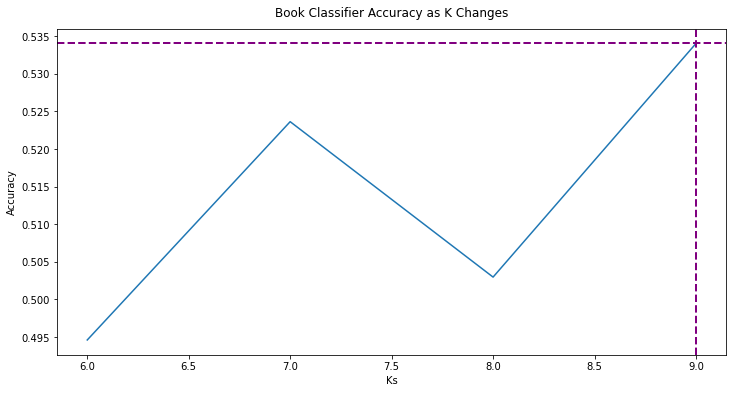

In [51]:
# lineplot of ks and accuracies

xs = list(range(6, 10))

f, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=xs, y=accuracies)

plt.axvline(best_k, linestyle='dashed', color='purple', linewidth=2)
plt.axhline(best_score, linestyle='dashed', color='purple', linewidth=2)
plt.xlabel('Ks')
plt.ylabel('Accuracy')

plt.title('Book Classifier Accuracy as K Changes', pad=12)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Get Recommendations for a Book

In [52]:
# get descriptive statitiscs of features
df_lib.describe()

,year,rating,is_Orwell,is_Asimov,is_Hesse,is_Huxley,is_Doyle,is_Tolkien,is_Martin,worth_reading
count,147122.000000,147122.000000,147122.000000,147122.000000,147122.000000,147122.000000,147122.000000,147122.000000,147122.000000,147122.000000
mean,1994.599856,7.528176,0.000333,0.001325,0.000496,0.000204,0.000238,0.000272,0.000075,0.565198
std,8.268444,1.712760,0.018247,0.036382,0.022270,0.014278,0.015422,0.016487,0.008647,0.495733
min,1376.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2021.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# books to get recommendations
books_list = [
              ['Tuf Voyaging', 1986, 0, 0, 0, 0, 0, 0, 1],
              ['The Perennial Philosophy', 1945, 0, 0, 0, 1, 0, 0, 0]
             ]

In [58]:
# function to normalize features of a book

def book_norm(books):
  for book in books:
    # year normalization
    book[1] = (book[1] - 1994.5) / 8.26
    # is_orwell
    book[2] = (book[2] - 0.00033) / 0.018
    # is_Asimov
    book[3] = (book[3] - 0.0013) / 0.036
    # is_Hesse
    book[4] = (book[4] - 0.00049) / 0.022
    # is_Huxley
    book[5] = (book[5] - 0.000204) / 0.014
    # is_Doyle
    book[6] = (book[6] - 0.000238) / 0.015
    # is_Tolkien
    book[7] = (book[7] - 0.000272) / 0.016
    # is_Martin
    book[8] = (book[8] - 0.000075) / 0.008
  
  return books

In [59]:
# function to get reccomendations

def get_recommendations(books):
  # list to store predictions
  predictions = []
  # list to store recommendations
  recommendations = []

  ''' book_recommend contains the book passed to the function and a list of recommended 
  books worth reading each with [book_title, author, distance to the book passed to the fucntion]
  '''
  book_recommend = []

  # normalize books features
  books = book_norm(books)

  # loop through each book in books
  for el in books:
    # store book_title
    book_title = el[0]
    book_recommend.append(book_title)
    #print(book_title)
    
    # turn book features into numpy array
    book = np.array([el[1:]])
    # reshape to (1, -1)
    book = book.reshape(1, -1)

    # predict if I will like the book
    prediction = classifier.predict(book)[0]
    predictions.append(prediction)

    if prediction == 1:
      print('\n', f'Multivac predicts that you will enjoy reading ... {book_title}!')
      print('... Here are some Reccomendations you may like:', '\n')
      # find recommendations for the book
      indices = list(classifier.kneighbors(book, return_distance=False)[0])
      distances = list(classifier.kneighbors(book)[0][0])
      #print('\n', indices)
      #print(distances)

      # recommend only the recommendations that are worth reading
      for i in range(len(indices)):
        index = indices[i]
        if df_lib.iloc[index].worth_reading == 1:
          recommend = [df_lib.iloc[index].title, df_lib.iloc[index].author, distances[i]]
          print(recommend)
          recommendations.append(recommend)

      book_recommend.append(recommendations)
      print('-----------------------------------------------------------------------------', '\n')  

    else:
      print(f'Multivac thinks that you won\'t enjoy reading ... {book_title}' )
      print('... Here are some Reccomendations you may like:', '\n')
      # find recommendations for the book
      indices = list(classifier.kneighbors(book, return_distance=False)[0])
      distances = list(classifier.kneighbors(book)[0][0])

      # recommend only the recommendations that are worth reading
      for i in range(len(indices)):
        index = indices[i]
        if df_lib.iloc[index].worth_reading == 1:
          recommend = [df_lib.iloc[index].title, df_lib.iloc[index].author, distances[i]]
          print(recommend)
          recommendations.append(recommend)
      
      book_recommend.append(reccomendations)
      print('-----------------------------------------------------------------------------', '\n')  


  print('\n', predictions)
  #return book_recommend



In [60]:
# check get_recommendations()
get_recommendations(books_list)


 Multivac predicts that you will enjoy reading ... Tuf Voyaging!
... Here are some Reccomendations you may like: 

['Up from Seltzer', 'Peter Hockstein', 3.7032832572728442]
['Random Acts of Kindness', 'Conari Press', 3.7317359206062197]
['Certain Smile', 'Judith Michael', 3.7317359206062197]
["The Girls' Guide to Hunting and Fishing", 'Melissa Bank', 3.7327939843054874]
['Feuerkind. Thriller.', 'Stephen King', 3.769949811462023]
['In the Forest', 'Marie Hall Ets', 124.99886981271088]
----------------------------------------------------------------------------- 


 Multivac predicts that you will enjoy reading ... The Perennial Philosophy!
... Here are some Reccomendations you may like: 

['From Thunder to Breakfast', 'Gene K. Garrison', 0.345676682404721]
['Night Visions: The Hellbound Heart', 'George R.R. Martin', 3.039569475758742]
['Die Firma. Roman.', 'John Grisham', 3.399744283114764]
["Demon's Gate", 'Steve White', 3.8800429081318764]
["Hart's War", 'John Katzenbach', 5.3211955

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)